Name: Archana 
PROJECT

Objective: Bitcoin closing price of day prediction based on the opening price

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from datetime import datetime as d

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
#importing the datasets
#training datasets
train_df = pd.read_csv (r'/content/drive/MyDrive/train_data.csv')
print (train_df)

           date            ts            wp        hi        lo      open
0    2017-02-25  1.487981e+09   1172.382511   1189.49   1110.00   1186.91
1    2017-12-28  1.514419e+09  14292.860031  15489.00  13500.00  15360.01
2    2016-08-05  1.470355e+09    579.201128    592.87    570.39    587.50
3    2015-11-21  1.448064e+09    324.774137    328.00    316.33    322.39
4    2015-11-26  1.448496e+09    342.988280    368.18    328.98    328.99
..          ...           ...           ...       ...       ...       ...
744  2016-01-29  1.454026e+09    376.906500    385.05    363.25    379.63
745  2015-08-02  1.438474e+09    280.488208    282.62    277.33    281.90
746  2017-10-08  1.507421e+09   4501.692441   4612.00   4420.01   4425.00
747  2016-08-07  1.470528e+09    594.310253    598.65    587.20    591.70
748  2017-03-03  1.488499e+09   1278.979821   1294.99   1255.61   1269.17

[749 rows x 6 columns]


In [196]:
#Converting the time stamp into time and date
import datetime
for i in range(len(train_df)):
    temp=train_df['ts'][i]
    train_df['ts'][i]=datetime.datetime.fromtimestamp(int(temp)).strftime('%Y-%m-%d %H:%M:%S')

print(train_df)

           date                   ts            wp        hi        lo  \
0    2017-02-25  2017-02-25 00:00:00   1172.382511   1189.49   1110.00   
1    2017-12-28  2017-12-28 00:00:00  14292.860031  15489.00  13500.00   
2    2016-08-05  2016-08-05 00:00:00    579.201128    592.87    570.39   
3    2015-11-21  2015-11-21 00:00:00    324.774137    328.00    316.33   
4    2015-11-26  2015-11-26 00:00:00    342.988280    368.18    328.98   
..          ...                  ...           ...       ...       ...   
744  2016-01-29  2016-01-29 00:00:00    376.906500    385.05    363.25   
745  2015-08-02  2015-08-02 00:00:00    280.488208    282.62    277.33   
746  2017-10-08  2017-10-08 00:00:00   4501.692441   4612.00   4420.01   
747  2016-08-07  2016-08-07 00:00:00    594.310253    598.65    587.20   
748  2017-03-03  2017-03-03 00:00:00   1278.979821   1294.99   1255.61   

         open  
0     1186.91  
1    15360.01  
2      587.50  
3      322.39  
4      328.99  
..        ...  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
#Forming 2 different columns of date and time
date=[]
time=[]
for i in range(len(train_df)):
    temp=train_df['ts'][i].split(" ")
    date.append(temp[0])
    time.append(temp[1])

In [198]:
#Inserting both column in dataframe
train_df.insert(2, "Date", date, True)
train_df.insert(3, "Time", time, True)

In [199]:
train_df

,date,ts,Date,Time,wp,hi,lo,open
0,2017-02-25,2017-02-25 00:00:00,2017-02-25,00:00:00,1172.382511,1189.49,1110.00,1186.91
1,2017-12-28,2017-12-28 00:00:00,2017-12-28,00:00:00,14292.860031,15489.00,13500.00,15360.01
2,2016-08-05,2016-08-05 00:00:00,2016-08-05,00:00:00,579.201128,592.87,570.39,587.50
3,2015-11-21,2015-11-21 00:00:00,2015-11-21,00:00:00,324.774137,328.00,316.33,322.39
4,2015-11-26,2015-11-26 00:00:00,2015-11-26,00:00:00,342.988280,368.18,328.98,328.99
...,...,...,...,...,...,...,...,...
744,2016-01-29,2016-01-29 00:00:00,2016-01-29,00:00:00,376.906500,385.05,363.25,379.63
745,2015-08-02,2015-08-02 00:00:00,2015-08-02,00:00:00,280.488208,282.62,277.33,281.90
746,2017-10-08,2017-10-08 00:00:00,2017-10-08,00:00:00,4501.692441,4612.00,4420.01,4425.00
747,2016-08-07,2016-08-07 00:00:00,2016-08-07,00:00:00,594.310253,598.65,587.20,591.70


In [200]:

#checking columns for NaN values
d = train_df.isnull().sum(axis=0)
d

date    0
ts      0
Date    0
Time    0
wp      0
hi      0
lo      0
open    0
dtype: int64

In [201]:
train_df["Time"].unique()

array(['00:00:00'], dtype=object)

In [202]:
#Converting date and time as they are string
#For date and time
date=[]
time=[]

for i in range(len(train_df)):
    t = float(train_df['Time'][i].replace(":",""))
    d = float(train_df['Date'][i].replace('-',''))
    date.append(d)
    time.append(t)

In [203]:
#inserting d,t columns in dataframe
train_df.insert(1, "D", date, True)
train_df.insert(3, "T", time, True)

In [204]:
train_df

,date,D,ts,T,Date,Time,wp,hi,lo,open
0,2017-02-25,20170225.0,2017-02-25 00:00:00,0.0,2017-02-25,00:00:00,1172.382511,1189.49,1110.00,1186.91
1,2017-12-28,20171228.0,2017-12-28 00:00:00,0.0,2017-12-28,00:00:00,14292.860031,15489.00,13500.00,15360.01
2,2016-08-05,20160805.0,2016-08-05 00:00:00,0.0,2016-08-05,00:00:00,579.201128,592.87,570.39,587.50
3,2015-11-21,20151121.0,2015-11-21 00:00:00,0.0,2015-11-21,00:00:00,324.774137,328.00,316.33,322.39
4,2015-11-26,20151126.0,2015-11-26 00:00:00,0.0,2015-11-26,00:00:00,342.988280,368.18,328.98,328.99
...,...,...,...,...,...,...,...,...,...,...
744,2016-01-29,20160129.0,2016-01-29 00:00:00,0.0,2016-01-29,00:00:00,376.906500,385.05,363.25,379.63
745,2015-08-02,20150802.0,2015-08-02 00:00:00,0.0,2015-08-02,00:00:00,280.488208,282.62,277.33,281.90
746,2017-10-08,20171008.0,2017-10-08 00:00:00,0.0,2017-10-08,00:00:00,4501.692441,4612.00,4420.01,4425.00
747,2016-08-07,20160807.0,2016-08-07 00:00:00,0.0,2016-08-07,00:00:00,594.310253,598.65,587.20,591.70


In [205]:
#sorting the dataset according to the date and time
train_df = train_df.sort_values(by=['Date', 'Time'])
train_df

,date,D,ts,T,Date,Time,wp,hi,lo,open
696,2015-04-15,20150415.0,2015-04-15 00:00:00,0.0,2015-04-15,00:00:00,222.270771,224.52,218.09,221.05
185,2015-04-16,20150416.0,2015-04-16 00:00:00,0.0,2015-04-16,00:00:00,227.779413,230.75,223.66,224.35
287,2015-04-18,20150418.0,2015-04-18 00:00:00,0.0,2015-04-18,00:00:00,223.398170,224.04,222.18,223.55
647,2015-04-19,20150419.0,2015-04-19 00:00:00,0.0,2015-04-19,00:00:00,224.667792,226.72,223.44,224.02
280,2015-04-21,20150421.0,2015-04-21 00:00:00,0.0,2015-04-21,00:00:00,227.170562,235.89,224.01,225.35
...,...,...,...,...,...,...,...,...,...,...
739,2017-12-31,20171231.0,2017-12-31 00:00:00,0.0,2017-12-31,00:00:00,13386.497711,14280.26,12633.80,12839.98
571,2018-01-01,20180101.0,2018-01-01 00:00:00,0.0,2018-01-01,00:00:00,13425.054178,13889.00,12952.50,13863.14
450,2018-01-03,20180103.0,2018-01-03 00:00:00,0.0,2018-01-03,00:00:00,14989.939350,15400.00,14628.00,14781.52
367,2018-01-04,20180104.0,2018-01-04 00:00:00,0.0,2018-01-04,00:00:00,14851.477880,15400.00,14230.00,15098.23


In [206]:
# drop ts and date
drop = ['ts', 'date']
train_df = train_df.drop(drop, axis=1)
train_df

,D,T,Date,Time,wp,hi,lo,open
696,20150415.0,0.0,2015-04-15,00:00:00,222.270771,224.52,218.09,221.05
185,20150416.0,0.0,2015-04-16,00:00:00,227.779413,230.75,223.66,224.35
287,20150418.0,0.0,2015-04-18,00:00:00,223.398170,224.04,222.18,223.55
647,20150419.0,0.0,2015-04-19,00:00:00,224.667792,226.72,223.44,224.02
280,20150421.0,0.0,2015-04-21,00:00:00,227.170562,235.89,224.01,225.35
...,...,...,...,...,...,...,...,...
739,20171231.0,0.0,2017-12-31,00:00:00,13386.497711,14280.26,12633.80,12839.98
571,20180101.0,0.0,2018-01-01,00:00:00,13425.054178,13889.00,12952.50,13863.14
450,20180103.0,0.0,2018-01-03,00:00:00,14989.939350,15400.00,14628.00,14781.52
367,20180104.0,0.0,2018-01-04,00:00:00,14851.477880,15400.00,14230.00,15098.23


In [207]:
#train label
label_df = pd.read_csv (r'/content/drive/MyDrive/train_label.csv')
print (label_df)

           date     close
0    2017-02-25   1158.00
1    2017-12-28  14450.01
2    2016-08-05    583.00
3    2015-11-21    327.00
4    2015-11-26    352.57
..          ...       ...
744  2016-01-29    378.68
745  2015-08-02    282.62
746  2017-10-08   4603.49
747  2016-08-07    595.14
748  2017-03-03   1292.86

[749 rows x 2 columns]


In [208]:
#sorting train label
l_df = label_df.sort_values(by=['date'])
l_df

,date,close
696,2015-04-15,224.35
185,2015-04-16,229.45
287,2015-04-18,224.02
647,2015-04-19,224.03
280,2015-04-21,235.89
...,...,...
739,2017-12-31,13863.13
571,2018-01-01,13480.01
450,2018-01-03,15098.14
367,2018-01-04,15144.99


In [209]:
#checking NaN values for label dataset
s = label_df.isnull().sum(axis=1)
s

0      0
1      0
2      0
3      0
4      0
      ..
744    0
745    0
746    0
747    0
748    0
Length: 749, dtype: int64

In [210]:
#candle graph for Bitcoin dataset
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=train_df['Date'],
                open=train_df['open'],
                high=train_df['hi'],
                low=train_df['lo'],
                close=l_df['close'])])
fig.update_layout(
    title='Candle graph of Bitcoin',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)
fig.show()

In [211]:

#combining training dataset and labeling dataset
main_df = pd.concat([train_df, l_df], axis=1)
#main_df = main_df.drop('date', axis=1)
print(main_df)

              D    T        Date      Time            wp        hi        lo  \
696  20150415.0  0.0  2015-04-15  00:00:00    222.270771    224.52    218.09   
185  20150416.0  0.0  2015-04-16  00:00:00    227.779413    230.75    223.66   
287  20150418.0  0.0  2015-04-18  00:00:00    223.398170    224.04    222.18   
647  20150419.0  0.0  2015-04-19  00:00:00    224.667792    226.72    223.44   
280  20150421.0  0.0  2015-04-21  00:00:00    227.170562    235.89    224.01   
..          ...  ...         ...       ...           ...       ...       ...   
739  20171231.0  0.0  2017-12-31  00:00:00  13386.497711  14280.26  12633.80   
571  20180101.0  0.0  2018-01-01  00:00:00  13425.054178  13889.00  12952.50   
450  20180103.0  0.0  2018-01-03  00:00:00  14989.939350  15400.00  14628.00   
367  20180104.0  0.0  2018-01-04  00:00:00  14851.477880  15400.00  14230.00   
35   20180107.0  0.0  2018-01-07  00:00:00  16526.973583  17115.01  15755.01   

         open        date     close  
6

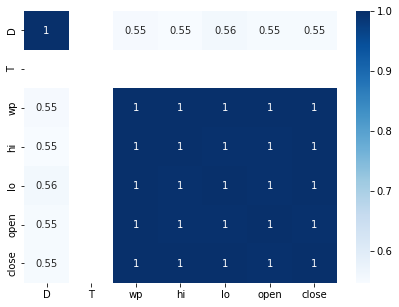

In [212]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(main_df.corr(),cmap='Blues',annot=True)

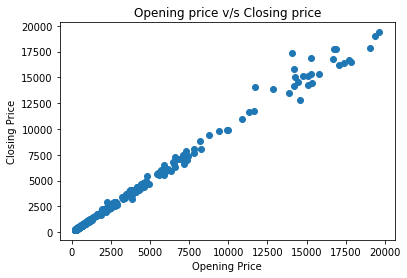

In [213]:
plt.title("Opening price v/s Closing price") #title
plt.xlabel("Opening Price") #x label
plt.ylabel("Closing Price") #y label
plt.scatter(main_df['open'], main_df['close'])

y = 1.00388 * x + 6.49029


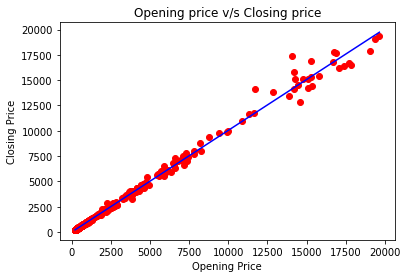

In [214]:

# fit a straight line to the data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
	return a * x + b
 
x = main_df['open']
y = main_df['close']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output

plt.title("Opening price v/s Closing price") #title
plt.xlabel("Opening Price") #x label
plt.ylabel("Closing Price") #y label

plt.scatter(x, y, color='red')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='blue')
plt.show()

In [215]:
from sklearn.model_selection import train_test_split
x=main_df.loc[:,['D', 'T','open','hi','lo','wp']]
y=main_df.loc[:,'close']

In [216]:
x

,D,T,open,hi,lo,wp
696,20150415.0,0.0,221.05,224.52,218.09,222.270771
185,20150416.0,0.0,224.35,230.75,223.66,227.779413
287,20150418.0,0.0,223.55,224.04,222.18,223.398170
647,20150419.0,0.0,224.02,226.72,223.44,224.667792
280,20150421.0,0.0,225.35,235.89,224.01,227.170562
...,...,...,...,...,...,...
739,20171231.0,0.0,12839.98,14280.26,12633.80,13386.497711
571,20180101.0,0.0,13863.14,13889.00,12952.50,13425.054178
450,20180103.0,0.0,14781.52,15400.00,14628.00,14989.939350
367,20180104.0,0.0,15098.23,15400.00,14230.00,14851.477880


In [217]:
y

696      224.35
185      229.45
287      224.02
647      224.03
280      235.89
         ...   
739    13863.13
571    13480.01
450    15098.14
367    15144.99
35     16174.22
Name: close, Length: 749, dtype: float64

In [218]:
print(x.shape)
print(y.shape)

(749, 6)
(749,)


In [219]:
#Splitting the dataset into 80-20 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=2)

In [224]:
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(x):
      x_train, x_test = x.iloc[train_index], x.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [225]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf1 = LinearRegression()
clf2 = SVR(kernel='poly',C=1) 
clf3 = SVR(kernel='sigmoid',C=500) 
clf4 = SVR(kernel='rbf',C=0.001)
clf5 = SVR(kernel='linear',C=0.0000008)
clf6 = RandomForestRegressor(max_depth=10, n_estimators=1000)

# #Standard Scaling
pipeline = make_pipeline(StandardScaler(with_mean=False), clf1)
# #Cross validation score
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=10, n_jobs=1)

clf1.fit(x_train, y_train)
predicted=clf1.predict(x_test)

#print('Cross Validation r2_score: %s' % scores)
#print('Cross Validation r2_score: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, predicted))
print("R2 Score: ",metrics.r2_score(y_test, predicted))

MAE:  25.587527511565106
RMSE: 61.021624999010186
MAPE: 0.009165021104068508
R2 Score:  0.9996656890494088


In [226]:
#Hyper-parameteric tuning - Grid Search
#Grid Search
from sklearn.model_selection import GridSearchCV

#For random forest
#grid_values = [{'max_depth': list(range(10, 12)), 'max_features': list(range(0,6))}]
#For linear Regression
grid_values = {'fit_intercept':[True, False],'copy_X':[True, False]}
#For SVR
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

grid = GridSearchCV(clf1, param_grid = grid_values,cv=2, refit=True, verbose=2)
grid.fit(x_train, y_train)

#Predict values based on new parameters
y_p = grid.predict(x_test)

# New Model Evaluation metrics 

from sklearn import metrics
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_p))
print('MAE: ', metrics.mean_absolute_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print("R2 Score: ",metrics.r2_score(y_test, y_p))

#Logistic Regression (Grid Search) Confusion matrix
#confusion_matrix(y_test,y_pred_acc)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.0s
[CV] END ..................copy_X=False, fit_intercept=False; total time=   0.0s
[CV] END ..................copy_X=False, fit_intercept=False; total time=   0.0s
MAPE: 0.009149279059980715
MAE:  25.584206932766968
RMSE: 61.01337715533985
R2 Score:  0.9996657794159998


In [160]:
!pip install rfpimp

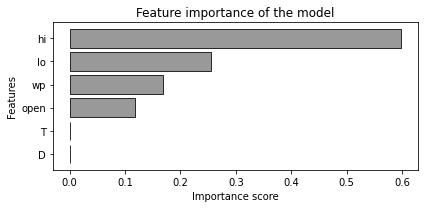

In [227]:
#Feature graph
import rfpimp
imp = rfpimp.importances(clf1, x_test, y_test)
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_ylabel('Features')
ax.set_title('Feature importance of the model')
plt.gca().invert_yaxis()

fig.tight_layout()

In [228]:
#test data
test_df = pd.read_csv (r'/content/drive/MyDrive/test_data.csv')
print (test_df)

           date            ts           wp       hi       lo     open
0    2016-07-16  1.468627e+09   667.010196   669.99   662.01   667.48
1    2016-09-20  1.474330e+09   608.817753   609.92   605.60   608.60
2    2017-02-27  1.488154e+09  1189.531393  1198.99  1176.00  1184.91
3    2016-10-08  1.475885e+09   618.950957   620.00   617.55   618.11
4    2015-12-08  1.449533e+09   395.036331   418.94   386.69   394.73
..          ...           ...          ...      ...      ...      ...
245  2017-02-22  1.487722e+09  1124.780081  1140.00  1104.90  1129.67
246  2017-01-24  1.485216e+09   908.492474   923.00   880.00   911.78
247  2016-08-18  1.471478e+09   575.128134   576.99   573.00   574.45
248  2015-11-11  1.447200e+09   316.034258   341.75   293.32   337.14
249  2015-12-24  1.450915e+09   455.087880   460.00   442.42   442.43

[250 rows x 6 columns]


In [229]:
#Converting the time stamp into time and date
import datetime
for i in range(len(test_df)):
    temp=test_df['ts'][i]
    test_df['ts'][i]=datetime.datetime.fromtimestamp(int(temp)).strftime('%Y-%m-%d %H:%M:%S')

print(test_df)

           date                   ts           wp       hi       lo     open
0    2016-07-16  2016-07-16 00:00:00   667.010196   669.99   662.01   667.48
1    2016-09-20  2016-09-20 00:00:00   608.817753   609.92   605.60   608.60
2    2017-02-27  2017-02-27 00:00:00  1189.531393  1198.99  1176.00  1184.91
3    2016-10-08  2016-10-08 00:00:00   618.950957   620.00   617.55   618.11
4    2015-12-08  2015-12-08 00:00:00   395.036331   418.94   386.69   394.73
..          ...                  ...          ...      ...      ...      ...
245  2017-02-22  2017-02-22 00:00:00  1124.780081  1140.00  1104.90  1129.67
246  2017-01-24  2017-01-24 00:00:00   908.492474   923.00   880.00   911.78
247  2016-08-18  2016-08-18 00:00:00   575.128134   576.99   573.00   574.45
248  2015-11-11  2015-11-11 00:00:00   316.034258   341.75   293.32   337.14
249  2015-12-24  2015-12-24 00:00:00   455.087880   460.00   442.42   442.43

[250 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
#Forming 2 different columns of date and time
date=[]
time=[]
for i in range(len(test_df)):
    temp=test_df['ts'][i].split(" ")
    date.append(temp[0])
    time.append(temp[1])

In [231]:
#Inserting both column in dataframe
test_df.insert(2, "Date", date, True)
test_df.insert(3, "Time", time, True)

In [232]:
#Converting date and time as they are string
#For date and time
date=[]
time=[]

for i in range(len(test_df)):
    t = float(test_df['Time'][i].replace(":",""))
    d = float(test_df['Date'][i].replace('-',''))
    date.append(d)
    time.append(t)

#inserting d,t columns in dataframe
test_df.insert(1, "D", date, True)
test_df.insert(3, "T", time, True)

In [233]:
test_df = test_df.sort_values(by=['Date', 'Time'])

In [234]:
# drop ts and date
drop = ['ts', 'date']
test_df = test_df.drop(drop, axis=1)

In [235]:
test_df

,D,T,Date,Time,wp,hi,lo,open
86,20150417.0,0.0,2015-04-17,00:00:00,224.970863,230.08,220.46,229.45
124,20150420.0,0.0,2015-04-20,00:00:00,225.063422,227.45,223.45,224.03
64,20150422.0,0.0,2015-04-22,00:00:00,236.029556,238.60,232.78,235.89
236,20150424.0,0.0,2015-04-24,00:00:00,232.433247,236.93,230.12,235.95
96,20150425.0,0.0,2015-04-25,00:00:00,229.581977,233.67,226.83,231.51
...,...,...,...,...,...,...,...,...
113,20171221.0,0.0,2017-12-21,00:00:00,16345.108730,17364.57,15151.00,16496.90
208,20171222.0,0.0,2017-12-22,00:00:00,13914.686881,15974.95,10400.00,15758.80
88,20180102.0,0.0,2018-01-02,00:00:00,13897.409572,15275.00,13005.00,13480.00
147,20180105.0,0.0,2018-01-05,00:00:00,15796.596968,17178.00,14819.78,15145.00


In [236]:
test_df['Time'].unique()

array(['00:00:00'], dtype=object)

In [237]:
drop = ['Date', 'Time']
t_df = test_df.drop(drop, axis=1)
t_df

,D,T,wp,hi,lo,open
86,20150417.0,0.0,224.970863,230.08,220.46,229.45
124,20150420.0,0.0,225.063422,227.45,223.45,224.03
64,20150422.0,0.0,236.029556,238.60,232.78,235.89
236,20150424.0,0.0,232.433247,236.93,230.12,235.95
96,20150425.0,0.0,229.581977,233.67,226.83,231.51
...,...,...,...,...,...,...
113,20171221.0,0.0,16345.108730,17364.57,15151.00,16496.90
208,20171222.0,0.0,13914.686881,15974.95,10400.00,15758.80
88,20180102.0,0.0,13897.409572,15275.00,13005.00,13480.00
147,20180105.0,0.0,15796.596968,17178.00,14819.78,15145.00


In [238]:
#predicting the values for dataset
#Predicted values on test dataset
y_pred = clf1.predict(t_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




In [239]:
y_pred

array([  226.96808722,   224.99591805,   235.68709605,   234.64491479,
         230.91950327,   224.33750463,   236.17041822,   237.81859786,
         241.12716317,   236.40852604,   236.65844128,   237.04114951,
         238.08808868,   239.22079712,   237.05779768,   231.98506021,
         223.92367552,   224.733042  ,   244.54459527,   261.73677186,
         261.95467013,   273.29453221,   280.24604194,   292.96539717,
         276.67959756,   277.88041723,   295.18190008,   284.53084303,
         264.1735027 ,   268.0240727 ,   258.79253595,   225.69420608,
         231.48968762,   239.17825326,   243.49227969,   233.10859841,
         232.69446351,   228.0468907 ,   235.83585076,   254.26356574,
         284.82074218,   390.44553879,   327.59381608,   335.86528656,
         323.82286453,   363.05581718,   375.37531569,   404.73578031,
         438.47399873,   451.84657129,   459.54023025,   436.19042815,
         448.53917908,   444.38547716,   427.46229138,   432.05715912,
      

In [242]:
test_pred = pd.DataFrame(y_pred, index=None)
test_pred.to_csv('test_pred.txt', header = None, index=None)

In [240]:
# printing test dataset opening and their predicted price by the model
predicted_df = pd.DataFrame({'Open': t_df['open'], 'Close': y_pred}).head(10)
predicted_df

,Open,Close
86,229.45,226.968087
124,224.03,224.995918
64,235.89,235.687096
236,235.95,234.644915
96,231.51,230.919503
62,227.05,224.337505
119,236.78,236.170418
234,235.93,237.818598
57,240.88,241.127163
59,236.93,236.408526


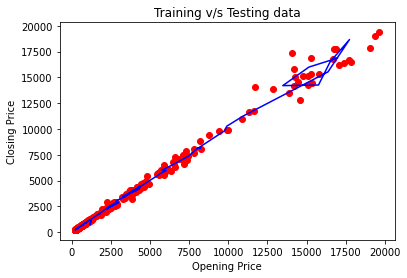

In [241]:
plt.scatter(main_df['open'], main_df['close'], color='red')
plt.plot(test_df['open'], y_pred, color='blue')
plt.title("Training v/s Testing data") #title
plt.xlabel("Opening Price") #x label
plt.ylabel("Closing Price") #y label
plt.show()